##### Mitchell Scott (mtscot4)
##### Phys 731R: Random Matrix Theory
##### Prof. Ilya Nemenman
##### Spring 2024

# Homework 4

## 1.
#### Double descent in Principal Components Regression. As promised, we will work on understanding overfitting in linear regression, following [this work](https://journals.aps.org/pre/pdf/10.1103/PhysRevE.106.025304?casa_token=7vVLwCzQ9FgAAAAA%3AgIr7tq9gtu646SpsLOtU-zzRYhrKkI3pkAYjdcLH2cMy3o2-2FT7nLRp_w4jIu-ZP4sBhM33369-aVQ). I am not asking you to do any analytics -- though I believe you should be able to follow the analytical work in this paper now. Instead, lets try to reproduce numerically some important findings.  We will work only in the linear regime, set up in section II of the paper, and we will work in the regime where the features and the parameter variables defined in the paper are all and the same (there's no random rotation and projection). We thus have a true (teacher) model as in Eqs. (1,2) with $f=1$ -- that is, there are $N_f$ "features" or "predictors". And the student has the same features and finds coefficients in front of them using standard liner regression, as in Eq. 6. One of the points of the paper is that the well-known phenomenon of overfitting when the number of features is as large as the number of data points $M$, is related to existence of zero eigenvalues of the $Z^\top Z$ matrix in the denominator of Eq 6. However, we know that spectra of random covariance matrices when $N_f>M$ and $N_f<M$ look very similar, save for a bunch of delta functions at zero. The delta functions are very easy to disambiguate from properly regressed parameters as long as $N_f$ is not near $M$, when the spectrum continuously merges into zero.  If we can get rid of delta functions (which is what the ridge regression regularization does), the $N_f>M$ and $N_f<M$ should be similar, and there will be no overfitting for large $M$. So what I propose here is to explore this problem in a head-on fashion. Generate random $y$'s from random features. Keep $\alpha=N_f/M$, fixed. Whiten the feature variables by calculating their principal components and perform regression *only* on the principal components with the corresponding eigenvalues away from zero. This is principal components regression. Having done the regression, evaluate the test error. My suspicion is that the test error will show a characteristic peak (double descent, as in decrease on both sides of the peak) form at $N_f=M$ as in fig 1b in the above paper. But, as is common, I may be wrong. Test it.

First we see that we have 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.matlib
from numpy import linalg as LA

from sklearn.decomposition import PCA

np.random.seed(23)

In [2]:
m = 100
nf = np.array([10,20,50,100,200,500,1000])
alp = nf/ m
nTrials = 10

lTe = np.zeros(nTrials)
lAve = np.zeros(nf.size)

for i in range(nf.size):            #Additionally loop over choose aspect ratio of matrices and loop
    for trial in range(nTrials):     # loop for 10 times produce average L_test
        A = np.matlib.rand(nf[i],1)
        # Training Data
        xTr = np.matlib.rand(m, nf[i])
        eTr = 1e-15 * np.matlib.rand(m, 1)
        # Testing Data
        xTe = np.matlib.rand(m, nf[i])
        eTe = 1e-15 * np.matlib.rand(m, 1)
        
        yTr = xTr * A + eTr
        Ainf = LA.lstsq(xTr, yTr, rcond=1e-15)
        PxTr, S, Vh = LA.svd(xTr, full_matrices=True)
        if Ainf[2] == m:
            PxTr = PxTr[0:m,:]
        Binf = LA.lstsq(PxTr, yTr, rcond = 1e-15)
        yTe = xTe * Ainf[0] 
        yest = Binf[0].T * xTe
        lTe[trial] = LA.norm(yTe - yest)
    lAve[i] = np.average(lTe)
        
        


# y = xA + \epislon, X = T x n, A = n x 1
# look at PCA of X, y_est = PC*b  b vec, PC is SVec of X
# min L = \sum_i (y_i - y_est(x_i))^2

# use estimated params on new data (new amtrix)

# plot should be n/T vs. l_test 

# Generate T_train, T_test

## Loop Generate A, generate x training and x_test, infer A_inferred B_inferred from x, PC(x) respectively. Calc L_test = sum(y(xtest) - y_est(x_test)^2



I have struggled with this problem for weeks now. I really wanted to get it right because I feel so close, but no matter how I change the if condition to enact the principle component regression, I am still getting this plot. I know the idea is to truncate the left singular vectors when the problem is of lower rank then it should be, but for the life of me, I cannot get it. I know everything else is correct with the code as I have gone to Prof. Nemenman's office hours a few times about this problem alone, and it is very frsutrating to have worked on it for weeks and not seen the results you wanted to, which is the double descent. At some point, I have to turn in an incorrect solution to recieve credit. I am sorry it is not correct, and that it took weeks to finally give up and turn it in.

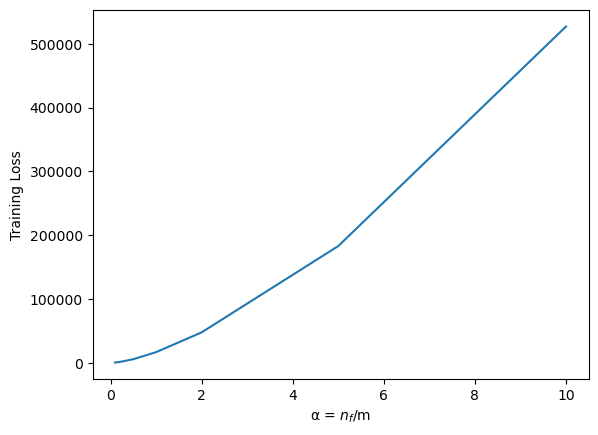

In [3]:
# Plot
plt.xlabel('α = $n_f$/m')
plt.ylabel('Training Loss')
plt.plot(alp, lAve)

## 2. Problem 9.1.1: Variance as a function of time under DBM

#### Consider the Dyson Brownian motion for a finite $N$ matrix:\begin{align} \text{d}\lambda_i &= \sqrt{\frac{2}{N}} \text{d}B_i + \frac{1}{N}\sum_{j=1, j\neq i}^N \frac{\text{d}t}{\lambda_i -\lambda_j} \end{align} and the function $F(\{\lambda_i\})$ that computes the second moment: \begin{align} F(\{\lambda_i\}) &= \frac{1}{N} \sum_{i=1}^N \lambda_i^2. \end{align}

### Write down the stochastic process for $F(\{\lambda_i\})$  using the Itô vectorial formula (8.17). In the case at hand $F$ does not depend explicitly on time and $\sigma_i^2 = 2/N$. You will need to use the following identity:\begin{align} 2\sum_{i,j=1, j\neq i}^N \frac{\lambda_i}{\lambda_i - \lambda_j} = \sum_{i,j=1, j\neq i}^N \frac{\lambda_i- \lambda_j}{\lambda_i - \lambda_j} &= N(N-1). \end{align}

First, we compute
\begin{align}
\frac{\partial F}{\partial \lambda_i} &= \frac{\partial }{\partial \lambda_i}\left(\frac{1}{N} \sum_{i=1}^N \lambda_i^2 \right)\\
&= \frac{1}{N} 2\lambda_i\\
\frac{\partial^2 F}{\partial \lambda_i \partial \lambda_j} &= \frac{2}{N}\delta_{ij} \\
\frac{\partial F}{\partial t} &= 0 \quad \text{ (by hint)}
\end{align}

Plugging into the Itô vectorial formula (8.17), we see
\begin{align}
\text{d}F_t &= \sum_{i=1}^N \frac{\partial F}{\partial \lambda_i} \text{d}\lambda_{i,t} + \left[ \frac{\partial F}{\partial t} + \sum_{i,j=1}^N \frac{C_{ij}(\lambda_i,t)}{2}\frac{\partial^2 F}{\partial \lambda_i \partial \lambda_j}\right]\text{d}t\\
&= \sum_{i=1}^N \frac{2}{N} \lambda_i \text{d}\lambda_i + \left[ \sum_{i,j=1}^N \frac{C_{ij}(\lambda_i)}{2}\frac{2}{N} \delta_{ij}\right]\text{d}t\\
&= \sum_{i=1}^N \frac{2}{N} \lambda_i \left(\sqrt{\frac{2}{N}} \text{d}B_i + \frac{1}{N}\sum_{j=1, j\neq i}^N \frac{\text{d}t}{\lambda_i -\lambda_j} \right) + \left[ \sum_{i=1}^N \frac{\sigma_i^2}{N}\right]\text{d}t
\end{align}
where we used the definition of $\text{d}\lambda_i$ and noticing that the only terms that will survive the $\delta_{ij}$ are the $C_{ii}$ terms, which is just the diagonals of the co-variance matrix. This is easy to see that $C_{ii} = \sigma_i^2$. Continuing on, aided by the identity that we were given in the problem statement,

\begin{align}
\text{d}F_t &= \sum_{i=1}^N \left(\sqrt{\frac{2}{N}} \right)^3 \lambda_i\text{d}B_i +  \frac{1}{N^2} \sum_{i=1}^N \sum_{j=1, j\neq i}^N \frac{2\lambda_i\text{d}t}{\lambda_i -\lambda_j} + \left[ \sum_{i=1}^N \frac{\sigma_i^2}{N}\right]\text{d}t\\
&= \sum_{i=1}^N \left(\sqrt{\frac{2}{N}} \right)^3 \lambda_i\text{d}B_i +  \frac{1}{N^2} N(N-1) \text{d}t+ \left[ \sum_{i=1}^N \frac{2}{N^2}\right]\text{d}t\\
&= \sum_{i=1}^N \left(\sqrt{\frac{2}{N}} \right)^3 \lambda_i\text{d}B_i +  \left[\frac{(N-1)}{N}+ \frac{2}{N}\right]\text{d}t\\
\text{d}F_t &= \sum_{i=1}^N \sigma_i^3 \lambda_i\text{d}B_i + \frac{(N+1)}{N}\text{d}t
\end{align}

### Take the expectation value of your equation and show that $F(t):= \mathbb{E}[F(\{\lambda_i(t)\})]$ follows \begin{align} F(t) = F(0) + \frac{N+1}{N}t.\end{align} Do not assume that $N$ is large.

Integrating over the stochastic process, we see

\begin{align}
F_t &= \int_0^t \sum_{i=1}^N\sigma_i^3\lambda_i \text{d}B_s + \frac{N+1}{N} t. 
\end{align}

Following the work that is presented in 8.2.3, namely Eq (8.18), it is not hard to see that 
\begin{align}
F(t) &= F(0) + \frac{N+1}{N}t
\end{align}

## 3. Problem 10.1.1: Taylor series for the R-transform
#### Let $g(z)$ be the Stieltjes transform of a random matrix $\mathbf{M}$: \begin{align} g(z) = \tau\left((z\mathbf{I} - \mathbf{M})^{-1}\right) &= \int_{\text{supp}\{\rho\}}\frac{\rho(\lambda)\text{d}\lambda}{z-\lambda}. \end{align} We saw that the power series of $g(z)$ around $z=\infty$ is given by the moments of $\mathbf{M} (m_n := \tau(\mathbf{M}^n)):$ \begin{align}g(z) &= \sum_{n=0}^\infty \frac{m_n}{z^{n+1}} \text{ with } m_0\equiv 1. \end{align} Call $\zeta(g)$ be the functional inverse of $g(z)$ which is well defined in the neighborhood of $g=0$. And define $R(g)$ as \begin{align} R(g) &= \zeta(g) - \frac{1}{g}.\end{align}

### By writing the power series of $R(g)$ near zero, show that $R(g)$ is regular at zero and that $R(0) = m_1.$ Therefore the power series of $R(g)$ starts at $g^0$: \begin{align} R(g) &= \sum_{n=1}^\infty \kappa_ng^{n-1}. \end{align}
First observe that we can write it as 
\begin{align}
g(z)  &= \sum_{k=0}^\infty \frac{m_k}{z^{k+1}},\\
&= \frac{1}{z} + \sum_{k=1}^\infty \frac{m_k}{z^{z+1}},
\end{align}

Then notice that we can take the definition of the $R$-transform and write it equivalently as 
\begin{align}
R(g) = \zeta(g) - \frac{1}{g} &\iff g(z)R(g(z)) = g(z)z - 1
\end{align}
by applying $g(z)$ on both sides, and remembering that $\zeta(g)$ is the functional inverse of $g$ so $\zeta(g(z)) = g(\zeta(z)) = z$. Note to do this step, we implicitly assumed that $g(z)$ is finite. This is a reasonable assumption because we remember that $g(z)$ was defined around $z=\infty$, so each term of $g(z)$, $m_n/z^{n+1}$ is rather small, so overall $g(z)$ is finite. In short, as $z\to \infty, g(z)\to \frac{1}{z}$ (since this is the leading term of the series). This fact implies $z \to 1/g$ as $g\to 0$. 

Now exploiting this equality, we see that 
\begin{align}
zg(z) - 1 = \sum_{k=1}^\infty \frac{m_k}{z^k},
\end{align}
just from manipulations of the power series for $g(z)$. Additionally, using the above analysis,
\begin{align}
g(z)R(g(z)) &= \sum_{i=1}^{\infty} \kappa_k \left( \frac{1}{z} + \sum_{\ell=1}^\infty \frac{m_\ell}{z^{\ell+1}}\right)^k.
\end{align}.


### Now assume that $m_1=\kappa_1 = 0$ and compute $\kappa_2, \kappa_3$ and $\kappa_4$ as a function of $m_2, m_3$, and $m_4$ in that case.

Given the above framework, we simply have to equate the above sums and match powers of $1/z$ to get the desired relationships between the free cumulants and moments, $\kappa_k$ and $m_k$, respectively. However, I want to exploit another more combinatoric argument between these two, which is 

\begin{align}
m_k = \sum_{\pi\in \text{NC}(n)} \kappa_{\pi_1}\cdots\kappa_{\pi_{\ell_\pi}},
\end{align}
where $\text{NC}(n)$ are the noncrossing paths.

##### Computing $m_1$
We are told that $m_1=k_1=0$

##### Computing $m_2$
Notice there are only two paths in this, namely $\{12\}$ and $\{1,2\}$, where the concatination indicates a noncrossing path and the comma indicates separate partitions. This can be translated as
\begin{align}
m_2 &= \sum_{\pi \in \text{NC}(2)} \kappa\\
&= \kappa_2 + \kappa_1^2
\end{align}
Now rewriting in the context of $\kappa_2$, we have
\begin{align}
\kappa_2 &= m_2 - \kappa_1^2\\
&= m_2 - m_1^2\\
&= m_2
\end{align}

##### Computing $m_3$
All of the noncrossing partitions for 3 numbers are: $\{123\}, \{12,3\}, \{1,23\}, \{13,2\}$ and $\{1,2,3\}$, which means
\begin{align}
m_3 &= \kappa_3 + \kappa_2\kappa_1 + \kappa_1\kappa_2 + \kappa_2\kappa_1 +\kappa_1^3\\
\kappa_3 &= m_3 - 3\kappa_1\kappa_2 -\kappa_1^3\\
&= m_3 - 3m_1(m_2 - m_1^2) - m_1^3\\
&= m_3 - 3m_1m_2 + 2m_1^3\\
&= m_3
\end{align}

##### Computing $m_4$
It is shorter to list the crossing partitionsw for 4 numbers, as the only configuration that is not in NC$(4)$ is $\{13,24\}$. This means
\begin{align}
m_4 &= \kappa_4 + 4\kappa_3\kappa_1 + 2\kappa_2\kappa_2 + 6\kappa_2\kappa_1^2 + \kappa_1^4\\
\kappa_4 &= m_4 - 4\left(m_3 - 3m_1m_2 + 2m_1^3\right)m_1 - 2(m_2 - m_1^2)^2 - 6(m_2 - m_1^2)m_1 - m_1^4\\
&=m_4 - 4m_1m_3 + 10 m_1^2m_2 - 2m_2^2 - 5m_1^4\\
&= m_4 - 2m_2^2
\end{align}

This is important to note that this is the first cumulant that hasn't just equalied the moment. We see that even with $m_1=\kappa_1=0$, we cannot get rid of the $m_2^2$ term. To see if this is a result of the fact that 4 is the first composite number on our list, we extend this work to $m_5$ to see if we get additional terms of just the $\kappa_5$ term. Since 5 is prime, this will indicate the relationship.

##### Computing $m_5$
After many careful computations, we do the above method to see that
\begin{align}
m_5 &= \kappa_5 + 5\kappa_4\kappa_1 + 5\kappa_3\kappa_2 + 10 \kappa_3\kappa_1^2 + \kappa_1^5\\
\kappa_5 &= m_5 - 5m_4m_1 - m_3m_2+15 m_3m_1^2 + 15 m_2^1m_1 - 35m_2m_1^3 + 14m_1^5\\
&= m_5 - 5m_3m_2.
\end{align}

Since 5 is prime, and we do see a splitting that isn't annahilated with $m_1=\kappa_1=0$, we just assume that the first few moments and cumulants  are equal just because all terms will require a first order part somewhere.

## 4. Problem 11.2.1: Cumulants of a constant
#### Show that a constant $\alpha\mathbf{I}$ has $\kappa_1 = \alpha$ and $\kappa_n = 0$ for $n\geq 2$. (Hint: compute $H_{\alpha\mathbf{I}}(k) = \log\left(\tau\left(e^{ik\alpha\mathbf{I}}\right)\right)$.)

By Eq 11.1.3 
\begin{align}
H_{\alpha\mathbf{I}} &:= \sum_{n=1}^\infty \frac{\kappa_n(\alpha\mathbf{I})}{n!}(ik)^n\\
&= \log \tau(e^{ik\alpha\mathbf{I}})
\end{align}

Now by Eq. 11.1.3
\begin{align}
H_{\alpha\mathbf{I}} &= \log \left(\sum_{\ell=0}^\infty \frac{(ik)^\ell}{\ell!} \tau\left((\alpha\mathbf{I})^\ell\right)\right)\\
&= \log \left(\sum_{\ell=0}^\infty \frac{(ik)^\ell}{\ell!} \frac{1}{N}\mathbb{E}\left(\text{tr}\left((\alpha\mathbf{I})^\ell\right)\right)\right)\\
\end{align}
Recognizing that $\text{tr}\left((\alpha\mathbf{I})^\ell\right)$ will just be $N\alpha$, and utilizing the Taylor Series of $e^x$, we see
\begin{align}
H_{\alpha\mathbf{I}} &= \log\left(\sum_{\ell=0}^\infty \frac{\left(ik\alpha\right)^\ell}{\ell!}\right)\\
&= \log e^{ik\alpha}\\
&= ik\alpha,
\end{align}

but by defintion of $H_{\alpha\mathbf{I}}$, we see
\begin{align}
H_{\alpha\mathbf{I}} &= ik\alpha\\
&= \sum_{n=1}^\infty \frac{\kappa_n(\alpha\mathbf{I})}{n!}(ik)^n\\
&= \kappa_1(\alpha\mathbf{I})ik + \sum_{n=2}^\infty \frac{\kappa_n(\alpha\mathbf{I})}{n!}(ik)^n.
\end{align}

This clearly shows that $\kappa_1(\alpha\mathbf{I}) = \alpha$ and $\kappa_n = 0, \forall n\geq 2$.